In [1]:
import numpy as np
import matplotlib.pyplot as plt
points_per_second = 100 # defines time resolution for continuous signal
def make_impulse_train(_t, _nT, _tshift):
    # takes a continuous time array and an array of time offsets for an impulse train
    impulse_train = np.zeros(_t.shape)
    for nT in _nT:
        impulse_train[np.absolute(_t-nT).argmin()] = 1
    # returns impulse train that is nan at all t except for t=nT, shifted by a value of _tshift (s)
    impulse_train = np.roll(impulse_train, _tshift*points_per_second)
    return impulse_train

# Digital Sampling Example
Consider the continuous time signal $f(t) = cos(\frac{2\pi t}{T})$ with a period of T = 16

The code below plots this function as a pseudo-continuous signal.

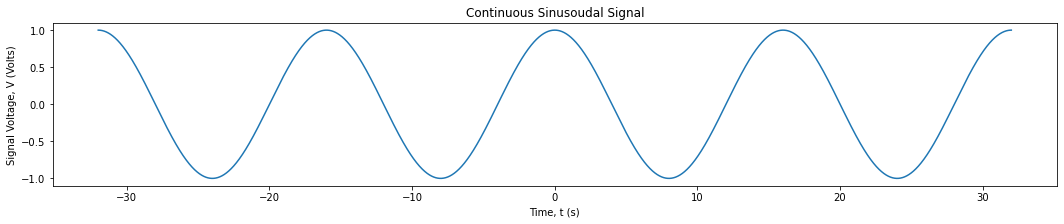

In [2]:
T_cos = 16
def f(_t):
    return np.cos(2*np.pi*(1/T_cos)*_t)

# pseudo-continuous signal
n_cycles = 4; tstart = -round(n_cycles*T_cos/2); tstop = round(n_cycles*T_cos/2)
t_cont = np.linspace(tstart, tstop, round(n_cycles*T_cos*points_per_second)+1) # 1000 time points per cycle
continuous_signal = f(t_cont)

plt.figure(figsize=(18,3));
plt.plot(t_cont, continuous_signal, label="Continuous Time Signal", color='C0')
plt.xlabel("Time, t (s)"); plt.ylabel("Signal Voltage, V (Volts)")
plt.title("Continuous Sinusoudal Signal");plt.show()

We will now observe how this continuous signal is sampled in discrete time. The first step in sampling is to make an impulse train. The impulse train shows where we will be sampling the continuous signal. We'll start by sampling twice per cycle.

[-32. -24. -16.  -8.   0.   8.  16.  24.  32.]


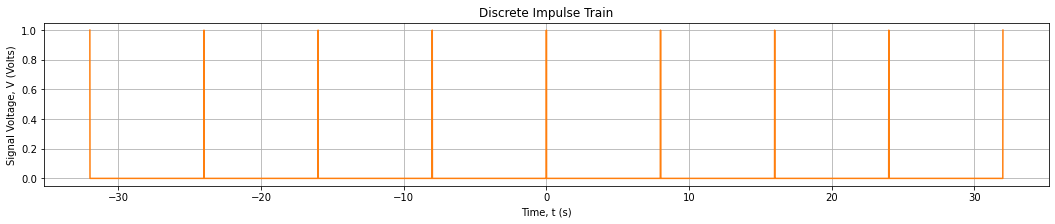

In [3]:
# discrete time sampling of continuous signal    
n_samples_per_cycle = 2 # Change this for exercise 1 & 2
Tshift = 0 # Change this for exercise 3

n_discrete_samples = int(n_cycles*n_samples_per_cycle)+1 
nT = np.linspace(tstart, tstop, n_discrete_samples); # array of times for impulse train
impulse_train = make_impulse_train(t_cont, nT, Tshift)
print(nT)

# plotting the sample
plt.figure(figsize=(18,3)); plt.grid(True, which='both')
plt.plot(t_cont, impulse_train, color='C1')
plt.xlabel("Time, t (s)"); plt.ylabel("Signal Voltage, V (Volts)")
plt.title("Discrete Impulse Train");plt.show()

The next step in sampling is to modulate the continuous signal by the impulse train. The code below multiplies continuous signal by the impulse train for each point in time. Does the result look like the original signal? What if we only take 1 sample per cycle? Or if we take 100 samples per cycle? 

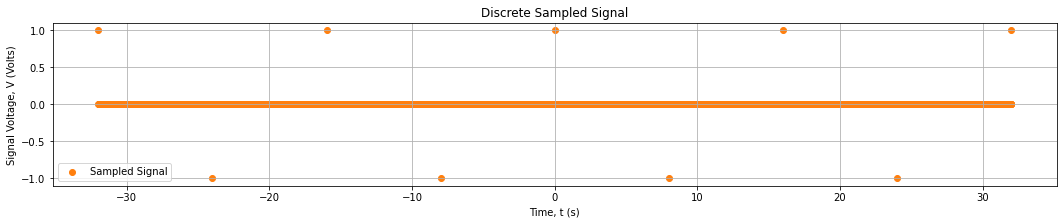

In [4]:
sampled_signal = np.multiply(continuous_signal, impulse_train)
plt.figure(figsize=(18,3)); plt.grid(True, which='both')
plt.scatter(t_cont, sampled_signal, label="Sampled Signal", color='C1')
plt.xlabel("Time, t (s)"); plt.ylabel("Signal Voltage, V (Volts)"); plt.legend()
plt.title("Discrete Sampled Signal");plt.show()

# Exercise 1
Plot the discretely sampled signal for a sample rate of once per cycle and a sample rate of twice per cycle. Include the plots in your prelab report along with answers to the following questions and plots when specified: 
- What would the interpolated signal for a sample rate of one sample per cycle look like? Note: Interpolation will only be calculated from the points where the impulse train is non-zero.
- What can we learn from a sample rate of twice per cycle that we can't learn from a sample rate of once per cycle? What is the name for the sampling frequency that samples twice per signal cycle?
- Can we get that same information from a sample rate between 1 and 2? Why or why not? Make some plots with sample rates between 1 and 2 to justify your answer.

# Exercise 2
Run the code above and for at least 3 different sample rates between 3 samples per cycle and 10 samples per cycle. Plot the sampled signal for each of your different sample rates. Include the number of samples per cycle in each graph. Explain your results and how they relate to the concepts from lecture. Include your plot and explanation in your prelab report.

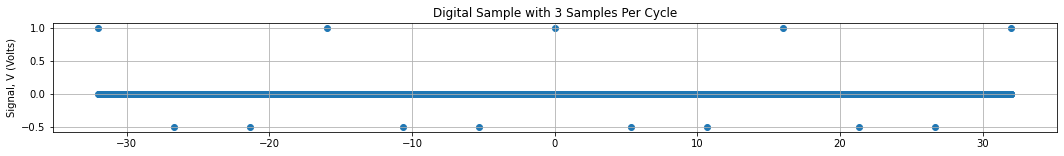

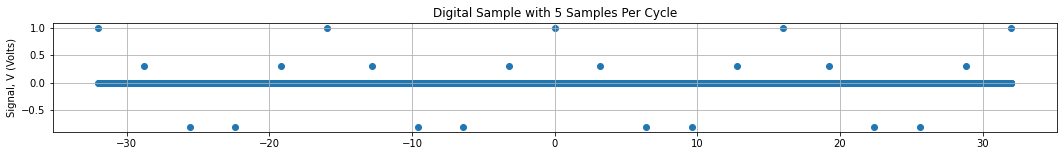

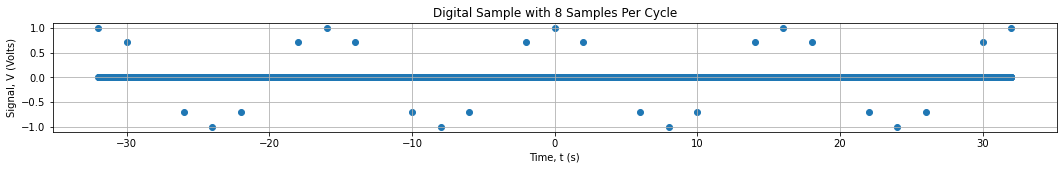

In [5]:
# this is my code that should be omitted from what we give students
samples_per_cycle = [3, 5, 8]
for sr in samples_per_cycle:
    plt.figure(figsize=(18,2)); plt.grid(True, which='both')
    n_discrete_samples = (n_cycles*sr)+1
    nT = np.linspace(tstart, tstop, n_discrete_samples); # array of times for impulse train
    impulse_train = make_impulse_train(t_cont, nT, 0)
    sampled_signal = np.multiply(continuous_signal, impulse_train)
    titlestr = "Digital Sample with " + str(sr) + " Samples Per Cycle"
    plt.scatter(t_cont, sampled_signal)
    plt.ylabel("Signal, V (Volts)"); plt.title(titlestr)
plt.xlabel("Time, t (s)")
plt.show()

# Exercise 3
Run the given code blocks witih a sample rate of 2 samples per cycle and at least 4 different values of Tshift.  Plot the sampled signals **on the same plot as the pseudo-continuous signal**. Denote Tshift clearly in the title of each plot. Answer the following questions and include them in your prelab report with your plots:
- What does Tshift do to the impulse train? 
- How do different values of Tshift impact the sampled cycle? 
- If we wanted to interpolate a signal with the same magnitude as the original from these samples would we be able to? Why or why not?

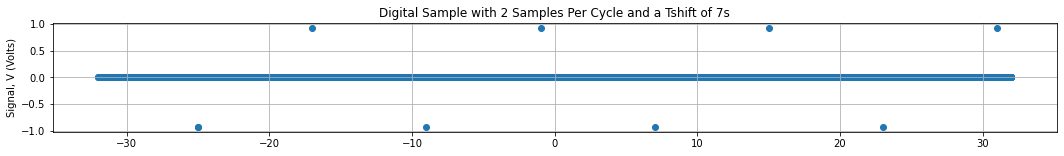

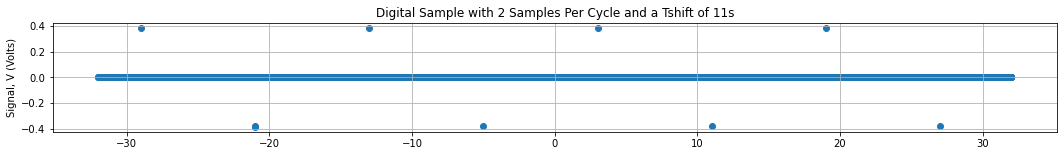

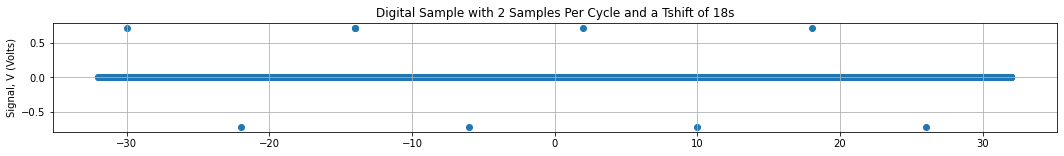

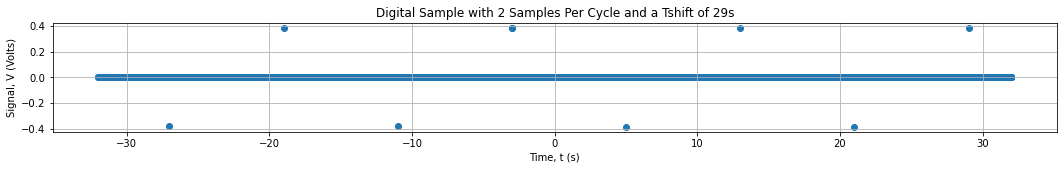

In [6]:
# this is my code that should be omitted from what we give students
time_shifts = [7, 11, 18, 29]
samples_per_cycle = 2
for ts in time_shifts:
    plt.figure(figsize=(18,2)); plt.grid(); plt.grid(True, which='both')
    n_discrete_samples = (n_cycles*samples_per_cycle)+1
    nT = np.linspace(tstart, tstop, n_discrete_samples); # array of times for impulse train
    impulse_train = make_impulse_train(t_cont, nT, ts)
    sampled_signal = np.multiply(continuous_signal, impulse_train)
    titlestr = "Digital Sample with " + str(samples_per_cycle) + " Samples Per Cycle and a Tshift of " + str(ts) + "s"
    plt.scatter(t_cont, sampled_signal)
    plt.ylabel("Signal, V (Volts)"); plt.title(titlestr)
plt.xlabel("Time, t (s)")
plt.show()

# Exercise 4
Repeat exercise 2 but this time with a nigh sample rate (>=50) and with only 2 different values of Tshift. Plot both on the same plot without the original signal. Does Tshift make a difference? Explain your results and how they relate to the concepts from lecture. Include your plot and explanation in your prelab report.

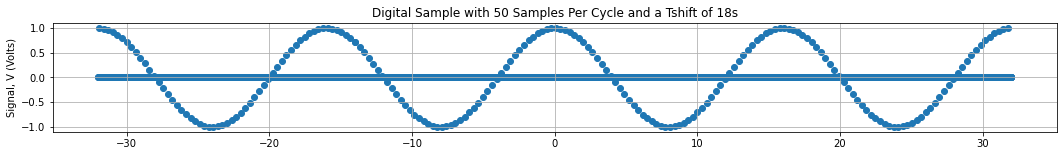

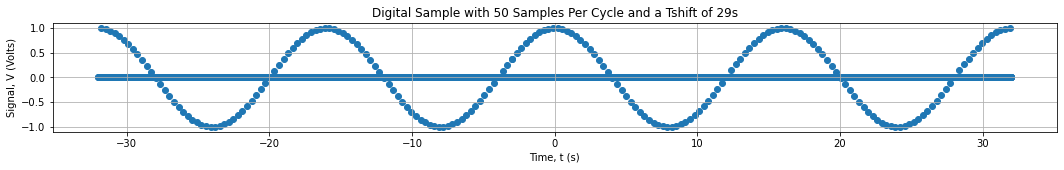

In [11]:
# this is my code that should be omitted from what we give students
time_shifts = [18, 29]
samples_per_cycle = 50
for ts in time_shifts:
    plt.figure(figsize=(18,2)); plt.grid(); plt.grid(True, which='both')
    #plt.plot(t_cont, continuous_signal, label="Original Signal", color='C0')
    nT = np.linspace(tstart, tstop, (n_cycles*samples_per_cycle)+1); # array of times for impulse train
    impulse_train = make_impulse_train(t_cont, nT, ts)
    sampled_signal = np.multiply(continuous_signal, impulse_train)
    titlestr = "Digital Sample with " + str(samples_per_cycle) + " Samples Per Cycle and a Tshift of " + str(ts) + "s"
    plt.scatter(t_cont, sampled_signal)
    plt.ylabel("Signal, V (Volts)"); plt.title(titlestr)
plt.xlabel("Time, t (s)")
plt.show()